In [4]:
import pandas as pd
file = 'Sagemont_Bammel.csv'

In [5]:
data = pd.read_csv(file, encoding="ISO-8859-1",index_col=0)

In [6]:
data.index = pd.to_datetime(data.index)
data.head()

,Sagemont,Bammel
Date,,
2000-01-01,2.08,1.64
2000-02-01,1.48,1.00
2000-03-01,1.47,0.96
2000-04-01,4.88,3.64
2000-05-01,5.15,7.16


In [7]:
Bammel_data = data.drop(['Sagemont'], axis =1)
Bammel_data.head()

,Bammel
Date,
2000-01-01,1.64
2000-02-01,1.00
2000-03-01,0.96
2000-04-01,3.64
2000-05-01,7.16


In [8]:
Bammel_data.index = pd.to_datetime(data.index)
Bammel_data.columns = ['Rainfall']
Bammel_data.head()

,Rainfall
Date,
2000-01-01,1.64
2000-02-01,1.00
2000-03-01,0.96
2000-04-01,3.64
2000-05-01,7.16


In [10]:
Sagemont_data = data.drop(['Bammel'], axis =1)
Sagemont_data.head()

,Sagemont
Date,
2000-01-01,2.08
2000-02-01,1.48
2000-03-01,1.47
2000-04-01,4.88
2000-05-01,5.15


In [11]:
Sagemont_data.index = pd.to_datetime(data.index)
Sagemont_data.columns = ['Rainfall']
Sagemont_data.head()

,Rainfall
Date,
2000-01-01,2.08
2000-02-01,1.48
2000-03-01,1.47
2000-04-01,4.88
2000-05-01,5.15


In [12]:
import matplotlib.pyplot as plt

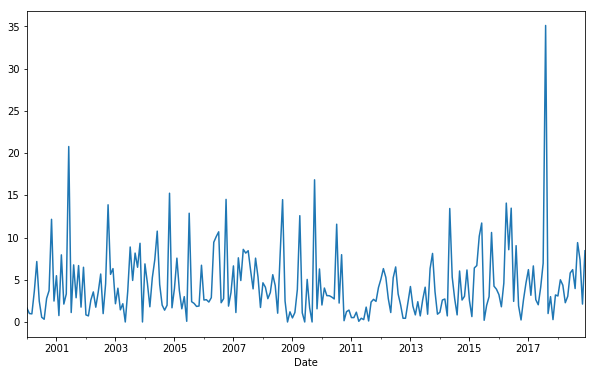

In [13]:
#Bammel Forest Observed
plt.figure(figsize=(10,6))
Bammel_data['Rainfall'].plot();
# plt.ylabel('Rainfall')
plt.savefig('MLPlots/Bammel_observed.png')

In [12]:
from pyramid.arima import auto_arima

stepwise_model = auto_arima(Bammel_data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

ModuleNotFoundError: No module named 'pyrarima'

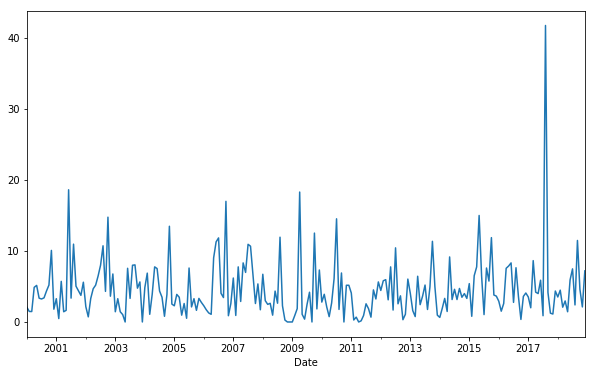

In [77]:
#Sagemont Observed
plt.figure(figsize=(10,6))
Sagemont_data['Rainfall'].plot();
# plt.ylabel('Rainfall')
plt.savefig('MLPlots/Sagemont_observed.png')

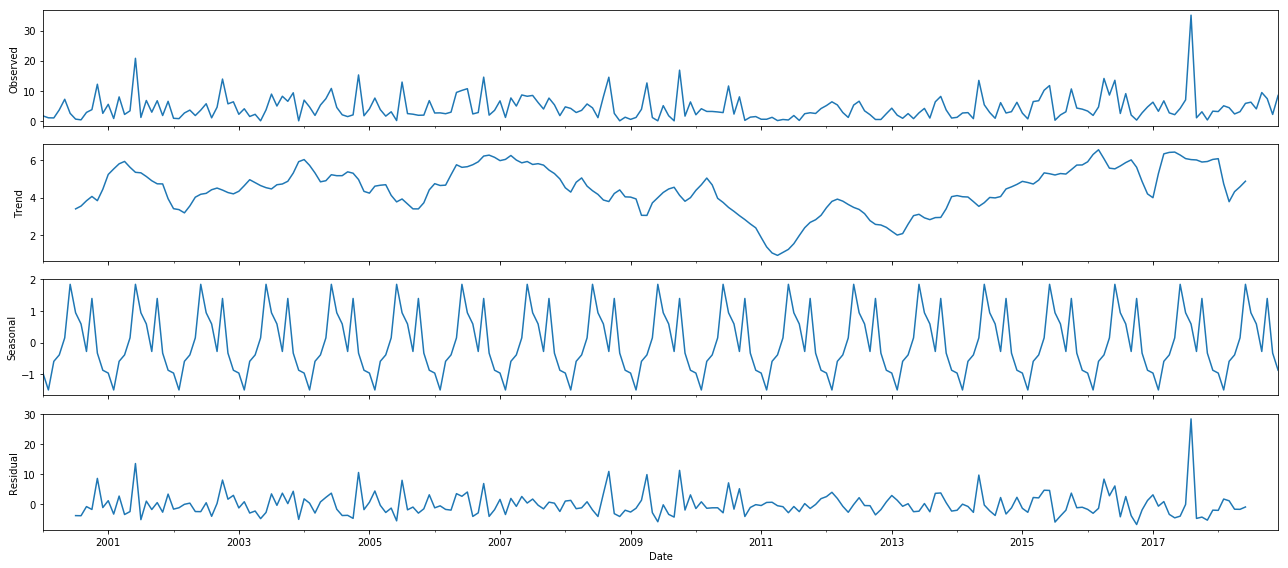

In [78]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

#Bammel Decomposition
decomposition = sm.tsa.seasonal_decompose(Bammel_data['Rainfall'], model='additive')
fig = decomposition.plot()
plt.savefig('MLPlots/Bammel_decomposed.png')
plt.show()

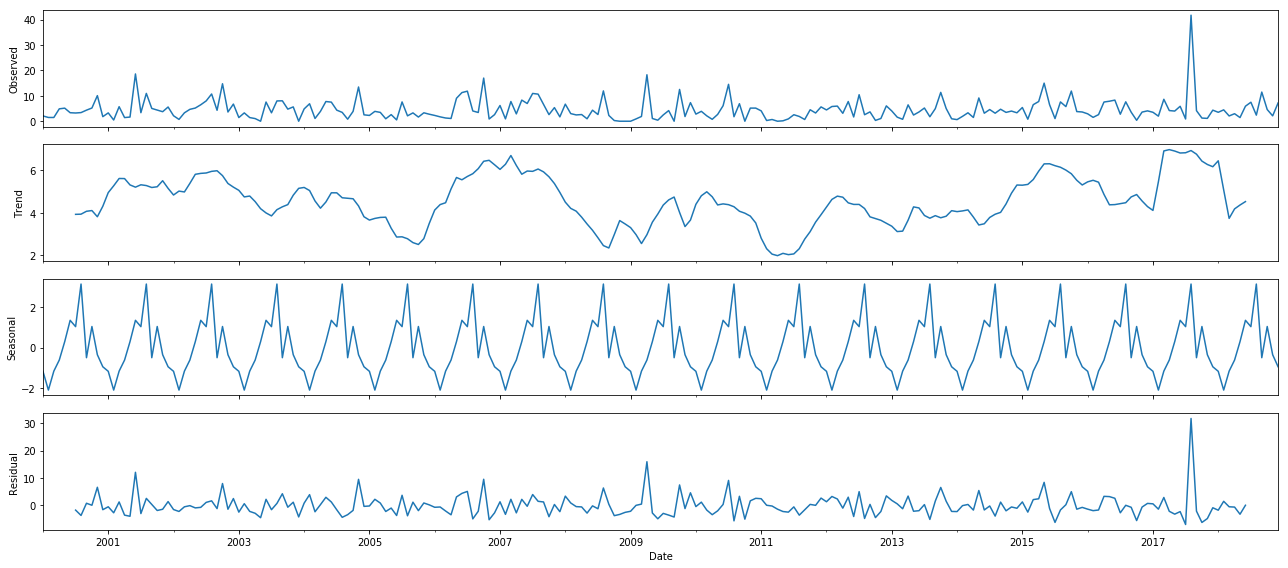

In [40]:
#Sagemont Decomposition
decomposition = sm.tsa.seasonal_decompose(Sagemont_data['Rainfall'], model='additive')
fig = decomposition.plot()
plt.savefig('MLPlots/Sagemont_decomposed.png')
plt.show()

In [79]:
import itertools
import statsmodels.api as sm


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [80]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Bammel_data['Rainfall'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:1

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1464.5465858351786
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1344.093005200177


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1365.1617633963124
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1180.2102276123871
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1320.252960339645
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1263.1593580327353
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1235.0261691065966


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1182.2097880603064
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1416.8391753027734
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1320.0787932354608
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1361.5064624224992


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1177.2096433763581
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1318.1126824628645
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1260.144735612472


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1236.672117684909


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1179.2092618568167
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1438.5463128221713
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1368.597952043051
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1515.543604400487


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1310.218171644835
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1374.8694353929861


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1366.7341789293823
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1378.0034044243894


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1312.2181043418873
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1289.9931662114527


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1224.8254397927005


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1360.3361875243972


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1175.876328827942
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1236.9757840509242


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1224.2508924652682


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1237.2718940130035


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1177.872794779988
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1387.7452039776963


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1311.4697954791054
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1366.863543327314


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1182.1186379970347
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1308.989037349928


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1265.1520096242186
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1231.372636219517


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1184.1182370799656
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1297.3023791714866


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1233.6991646666775


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1359.7855746820564


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1179.1481072968409


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1239.100293585185


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1233.059912525211


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1232.2198294860173


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1181.1476673686216
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1376.8621908102232
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1310.1396112295192
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1453.944020198121


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1259.7870843532846
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1310.2840781039874


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1310.7666606033224
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1315.9409254985944


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1261.7870863637722
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1291.9877736861358
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1226.8245119957091


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1362.089630093983


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1177.846668117533
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1233.0858364062076


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1226.2303249022066


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1233.1272864683142


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1179.8417824282533


In [73]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Sagemont_data['Rainfall'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            Sresults = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, Sresults.aic))
        except:
            continue

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:1

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1478.9635255334256
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1368.6784330143846
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1391.4409696453592


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1192.6178429584902
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1342.627270691737
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1269.8806416506386


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1244.0371118362814


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1206.5905392022423
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1436.5777219492024
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1349.2927578750227


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1387.0278479926296


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1189.1410937347105
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1341.994629347781


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1266.2773000484144
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1245.4589927701913


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1202.3276733538141
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1462.9072967686602
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1395.8510684889923
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1548.2393009205257


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1338.4014613130605
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1401.446071918306
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1396.8936135802928
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1390.3529303483929


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1340.4001609352927
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1306.5427930633196
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1246.7383910616868


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1386.4435361210358


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1190.8679024304931
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1257.7068585111365


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1248.107338607923


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1246.239704877997


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1192.8677213132246
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1408.912147105473
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1339.347604845214
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1392.4446234160146


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1193.9562647608636
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1333.9182224490542


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1271.105857481711
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1240.321419240713


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1207.7161117972464
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1313.904729931691


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1254.9307659721524
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1388.440086868461


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1191.1803979259066


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1259.9057233875442


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1268.210734409326


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1241.7859259408096


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1204.143968928604
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1388.4165679002126
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1325.153150133987
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1472.5917967655917


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1272.7192187252235
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1325.1328682639792
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1326.3185514191211


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1314.0512879835169


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1274.7181780632393
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1308.5297234894779


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1248.7071194113223
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1387.5175421135045


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1192.0077294214568
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1254.2038791206642


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1250.0938002550183


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1241.884870109232


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1194.0074865864253


In [81]:
#most optimal option for both Sagemont and Bammel = (1,1,1,12) because it yields the lowest AIC Akaike Information Critera
mod = sm.tsa.statespace.SARIMAX(Bammel_data['Rainfall'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0129      0.076     -0.169      0.866      -0.162       0.137
ma.L1         -0.9558      0.029    -32.524      0.000      -1.013      -0.898
ar.S.L12       0.0003      0.003      0.084      0.933      -0.006       0.006
ma.S.L12      -0.9123      0.098     -9.291      0.000      -1.105      -0.720
sigma2        18.2789      0.756     24.169      0.000      16.797      19.761


In [74]:
#Sagemont
mod = sm.tsa.statespace.SARIMAX(Sagemont_data['Rainfall'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

Sresults = mod.fit()

print(Sresults.summary().tables[1])

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0668      0.104     -0.644      0.520      -0.270       0.137
ma.L1         -1.0266      0.036    -28.492      0.000      -1.097      -0.956
ar.S.L12   -2.793e-05      0.030     -0.001      0.999      -0.059       0.059
ma.S.L12      -1.0000    337.195     -0.003      0.998    -661.891     659.891
sigma2        17.3499   5850.804      0.003      0.998   -1.15e+04    1.15e+04


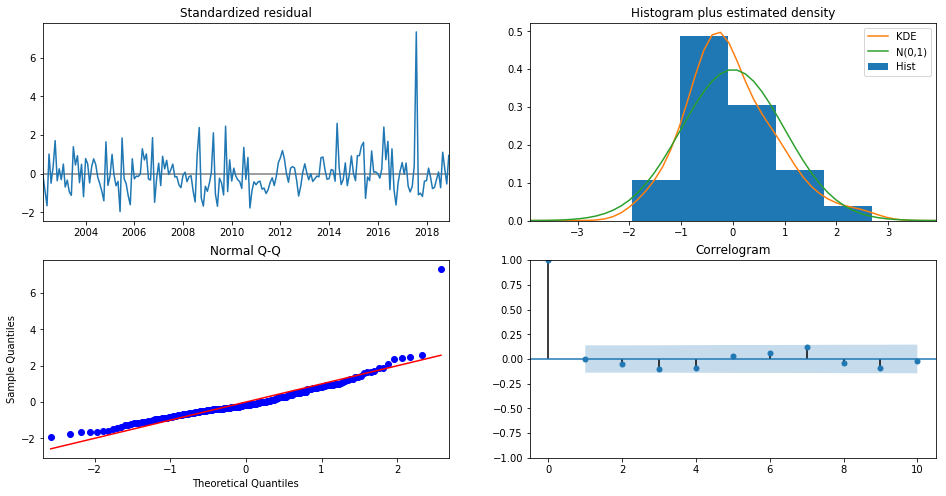

In [82]:
#Bammel diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

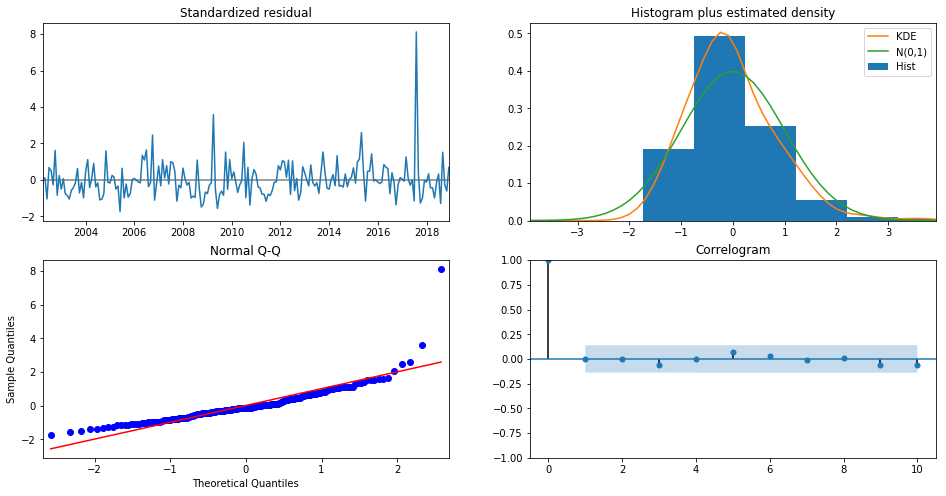

In [76]:
#Sagemont diagnostics
Sresults.plot_diagnostics(figsize=(16,8))
plt.show()

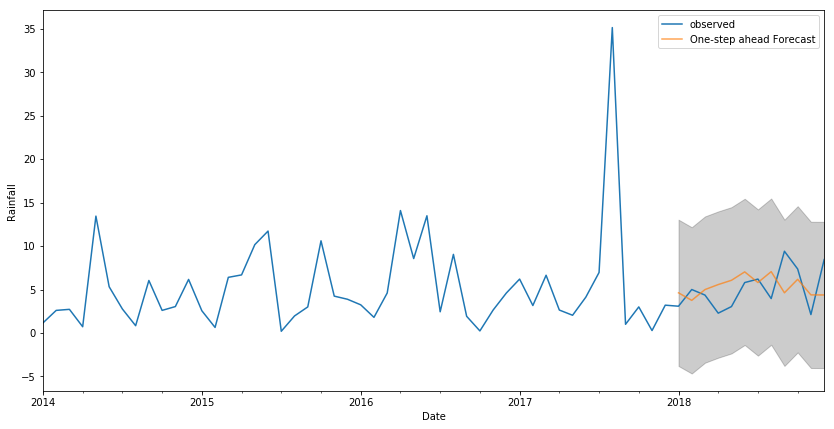

In [83]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = Bammel_data['Rainfall']['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()

plt.savefig('MLPlots/Bammel_onestepforecast1.png')
plt.show()

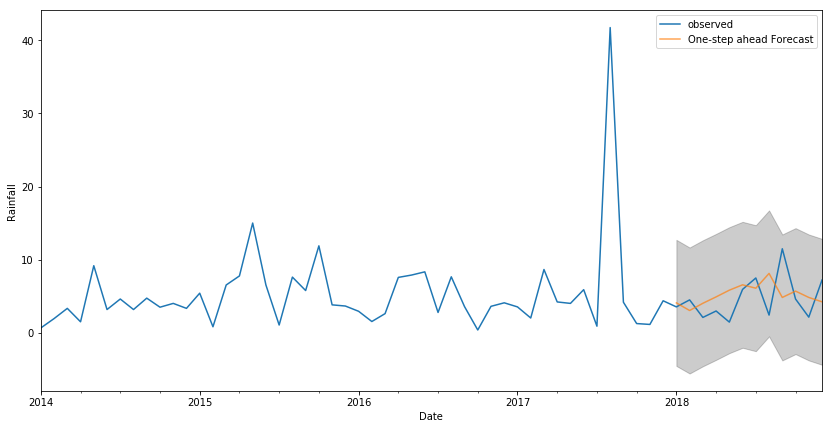

In [70]:
#Sagemont Onestep Forecast
pred = Sresults.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = Sagemont_data['Rainfall']['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()

plt.savefig('MLPlots/Sagemont_onestepforecast1.png')
plt.show()

In [84]:
y_forecasted = pred.predicted_mean
y_truth = Bammel_data['Rainfall']['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of Bammel forecasts is {}'.format(round(mse, 2)))

import numpy as np
print('The Root Mean Squared Error of Bammel forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of Bammel forecasts is 6.78
The Root Mean Squared Error of Bammel forecasts is 2.6


In [50]:
y_forecasted = pred.predicted_mean
y_truth = Sagemont_data['Rainfall']['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of Sagemont forecasts is {}'.format(round(mse, 2)))

import numpy as np
print('The Root Mean Squared Error of Sagemont forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of Sagemont forecasts is 10.47
The Root Mean Squared Error of Sagemont forecasts is 3.24


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


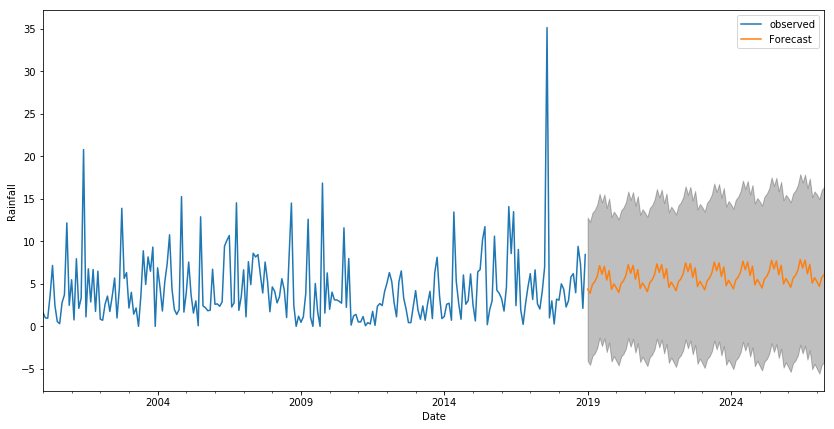

In [85]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = Bammel_data['Rainfall'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')

plt.legend()
plt.savefig('MLPlots/Bammel_forecast.png')
# plt.show()
print(pred_uc)

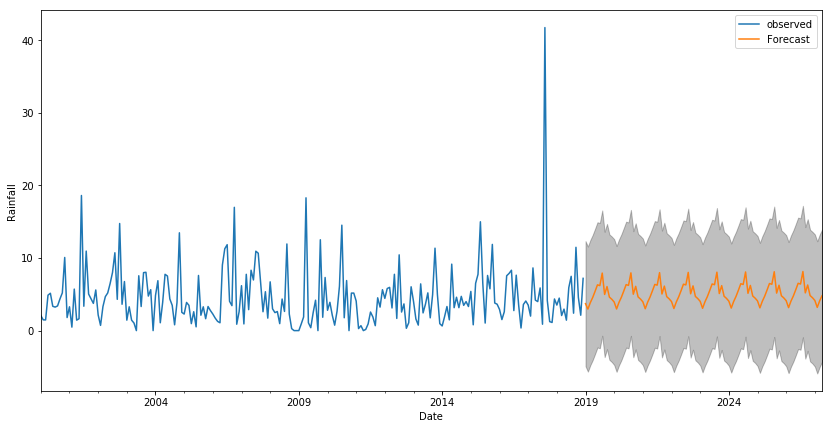

In [59]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = Sagemont_data['Rainfall'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')

plt.legend()
plt.savefig('MLPlots/Sagemont_forecast.png')
plt.show()

In [24]:
#Comparing Bammel and Sagemont

full_data = data.reset_index()
full_data.head()

,Date,Sagemont,Bammel
0,2000-01-01,2.08,1.64
1,2000-02-01,1.48,1.00
2,2000-03-01,1.47,0.96
3,2000-04-01,4.88,3.64
4,2000-05-01,5.15,7.16


In [25]:
Bammel_data1 = full_data.drop(['Sagemont'], axis =1)
Bammel_data1.head()

,Date,Bammel
0,2000-01-01,1.64
1,2000-02-01,1.00
2,2000-03-01,0.96
3,2000-04-01,3.64
4,2000-05-01,7.16


In [26]:
Sagemont_data1 = full_data.drop(['Bammel'], axis =1)
Sagemont_data1.head()

,Date,Sagemont
0,2000-01-01,2.08
1,2000-02-01,1.48
2,2000-03-01,1.47
3,2000-04-01,4.88
4,2000-05-01,5.15


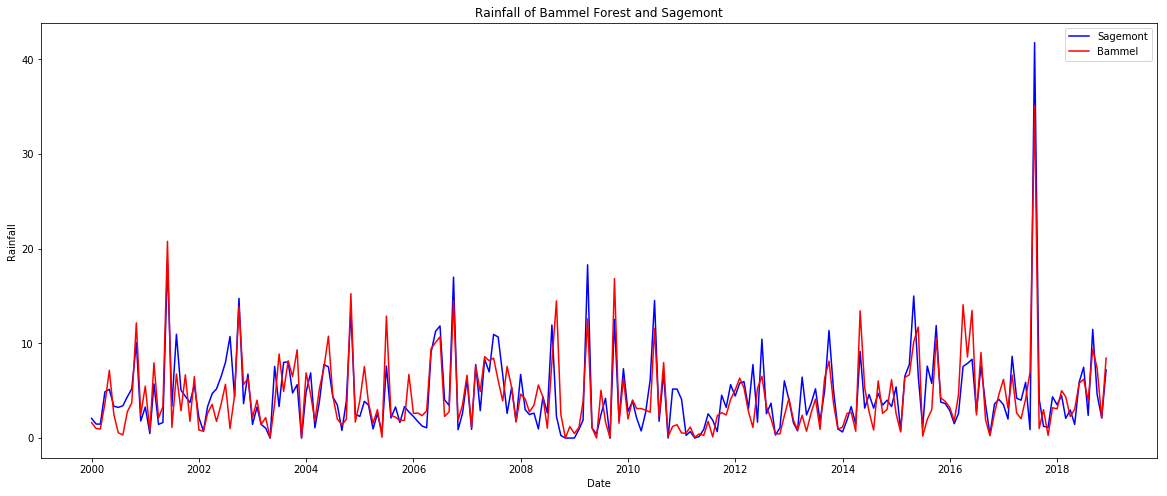

In [27]:
plt.figure(figsize=(20, 8))
plt.plot(full_data['Date'], full_data['Sagemont'], 'b-', label = 'Sagemont')
plt.plot(full_data['Date'], full_data['Bammel'], 'r-', label = 'Bammel')
plt.xlabel('Date'); plt.ylabel('Rainfall'); plt.title('Rainfall of Bammel Forest and Sagemont')
plt.legend();
plt.savefig('MLPlots/BammelvsSagemont.png')

In [28]:
first_date = full_data.ix[np.min(list(np.where(full_data['Bammel'] > full_data['Sagemont'])[0])), 'Date']

print("Bammel Forest Neighborhood first time with higher rainfall than Sagemont {}.".format(first_date.date()))

Bammel Forest Neighborhood first time with higher rainfall than Sagemont 2000-05-01.


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [29]:
from fbprophet import Prophet

Bammel_data1 = Bammel_data1.rename(columns={'Date': 'ds', 'Bammel': 'y'})
Bammel_model = Prophet(interval_width=0.95)
Bammel_model.fit(Bammel_data1)

Sagemont_data1 = Sagemont_data1.rename(columns={'Date': 'ds', 'Sagemont': 'y'})
Sagemont_model = Prophet(interval_width=0.95)
Sagemont_model.fit(Sagemont_data1)

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
Bammel_forecast = Bammel_model.make_future_dataframe(periods=36, freq='MS')
Bammel_forecast = Bammel_model.predict(Bammel_forecast)

Sagemont_forecast = Sagemont_model.make_future_dataframe(periods=36, freq='MS')
Sagemont_forecast = Sagemont_model.predict(Sagemont_forecast)

<Figure size 1296x432 with 0 Axes>

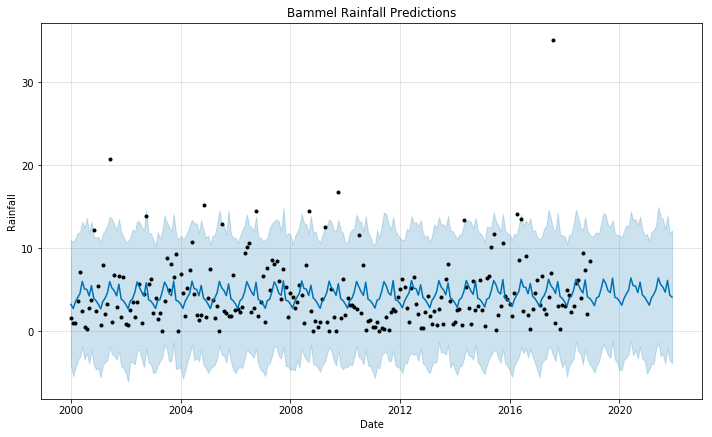

In [31]:
plt.figure(figsize=(18, 6))
Bammel_model.plot(Bammel_forecast, xlabel = 'Date', ylabel = 'Rainfall')
plt.title('Bammel Rainfall Predictions');
plt.savefig('MLPlots/BammelRainfallPredictions.png')

<Figure size 1296x432 with 0 Axes>

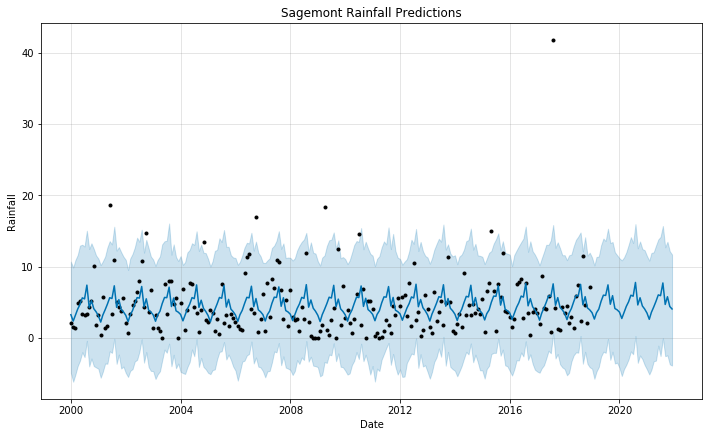

In [32]:
plt.figure(figsize=(18, 6))
Sagemont_model.plot(Sagemont_forecast, xlabel = 'Date', ylabel = 'Rainfall')
plt.title('Sagemont Rainfall Predictions');
plt.savefig('MLPlots/SagemontRainfallPredictions.png')

In [33]:
Bammel_names = ['Bammel_%s' % column for column in Bammel_forecast.columns]
Sagemont_names = ['Sagemont_%s' % column for column in Sagemont_forecast.columns]

merge_Bammel_forecast = Bammel_forecast.copy()
merge_Sagemont_forecast = Sagemont_forecast.copy()

merge_Bammel_forecast.columns = Bammel_names
merge_Sagemont_forecast.columns = Sagemont_names

forecast = pd.merge(merge_Bammel_forecast, merge_Sagemont_forecast, how = 'inner', left_on = 'Bammel_ds', right_on = 'Sagemont_ds')

forecast = forecast.rename(columns={'Bammel_ds': 'Date'}).drop('Sagemont_ds', axis=1)
forecast.head()



,Date,Bammel_trend,Bammel_yhat_lower,Bammel_yhat_upper,Bammel_trend_lower,Bammel_trend_upper,Bammel_additive_terms,Bammel_additive_terms_lower,Bammel_additive_terms_upper,Bammel_yearly,...,Sagemont_additive_terms,Sagemont_additive_terms_lower,Sagemont_additive_terms_upper,Sagemont_yearly,Sagemont_yearly_lower,Sagemont_yearly_upper,Sagemont_multiplicative_terms,Sagemont_multiplicative_terms_lower,Sagemont_multiplicative_terms_upper,Sagemont_yhat
0,2000-01-01,4.253358,-4.100874,10.959019,4.253358,4.253358,-1.022193,-1.022193,-1.022193,-1.022193,...,-1.169434,-1.169434,-1.169434,-1.169434,-1.169434,-1.169434,0.0,0.0,0.0,3.262806
1,2000-02-01,4.253938,-5.446905,10.792624,4.253938,4.253938,-1.522563,-1.522563,-1.522563,-1.522563,...,-2.065403,-2.065403,-2.065403,-2.065403,-2.065403,-2.065403,0.0,0.0,0.0,2.367570
2,2000-03-01,4.254482,-4.394794,11.138123,4.254482,4.254482,-0.719268,-0.719268,-0.719268,-0.719268,...,-1.243416,-1.243416,-1.243416,-1.243416,-1.243416,-1.243416,0.0,0.0,0.0,3.190243
3,2000-04-01,4.255062,-3.594926,11.873361,4.255062,4.255062,-0.178155,-0.178155,-0.178155,-0.178155,...,-0.376653,-0.376653,-0.376653,-0.376653,-0.376653,-0.376653,0.0,0.0,0.0,4.057739
4,2000-05-01,4.255624,-3.135117,11.905425,4.255624,4.255624,0.288229,0.288229,0.288229,0.288229,...,0.261632,0.261632,0.261632,0.261632,0.261632,0.261632,0.0,0.0,0.0,4.696735


In [34]:
forecast.to_csv("forecast_data.csv", encoding='utf-8', index=False)

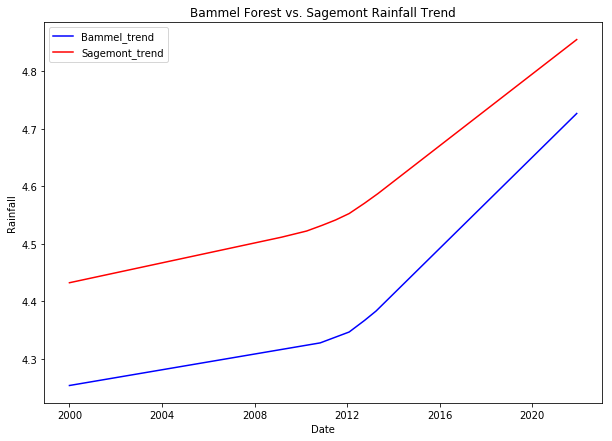

In [35]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['Bammel_trend'], 'b-')
plt.plot(forecast['Date'], forecast['Sagemont_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Rainfall')
plt.title('Bammel Forest vs. Sagemont Rainfall Trend');
plt.savefig('MLPlots/BammelvsSagemondTrend.png')

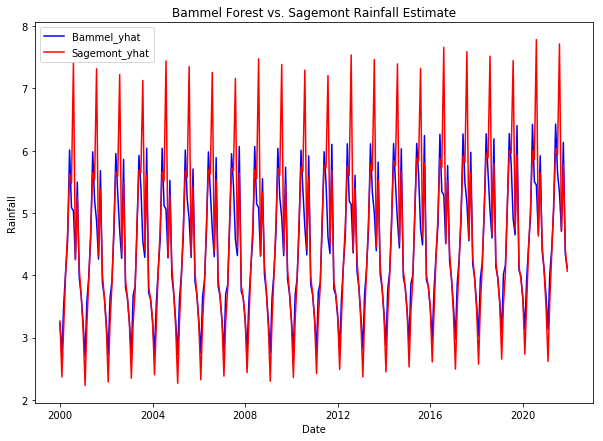

In [36]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['Bammel_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['Sagemont_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Rainfall')
plt.title('Bammel Forest vs. Sagemont Rainfall Estimate');

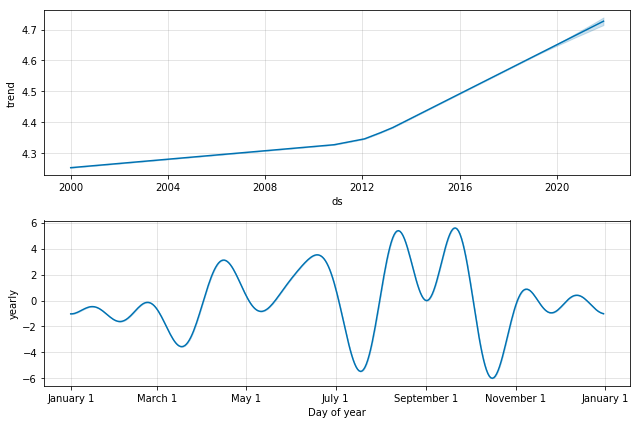

In [37]:
Bammel_model.plot_components(Bammel_forecast);
plt.savefig('MLPlots/BammelMonths.png')

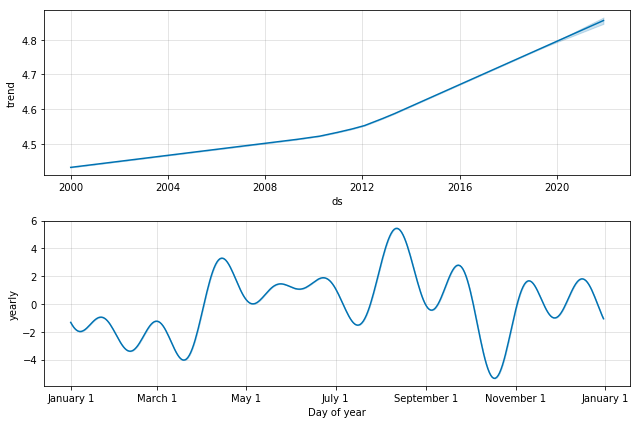

In [38]:
Sagemont_model.plot_components(Sagemont_forecast);
plt.savefig('MLPlots/SagemontMonths.png')